<a href="https://colab.research.google.com/github/Susanati/RecommendationSystem/blob/main/Sistema_de_recomenda%C3%A7%C3%A3o_de_livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O que é sistema de recomendação?**

Um sistema de recomendação é uma tecnologia que fornece sugestões personalizadas aos usuários, com o objetivo de ajudá-los a descobrir itens ou conteúdos relevantes. Esses sistemas são amplamente utilizados em várias plataformas online, como lojas virtuais, serviços de streaming de vídeo, redes sociais e sites de notícias.

A ideia básica por trás de um sistema de recomendação é analisar as preferências e o comportamento do usuário, bem como outros dados relevantes, e usar algoritmos para gerar sugestões que atendam às suas necessidades e interesses específicos. Esses algoritmos podem ser baseados em diferentes técnicas, como filtragem colaborativa, filtragem baseada em conteúdo, aprendizado de máquina e mineração de dados.


**A filtragem baseada em conteúdo**, por sua vez, analisa as características e atributos dos itens em si, e não apenas as interações dos usuários. Por exemplo, um sistema de recomendação de música pode sugerir novas faixas com base nas características musicais de músicas que o usuário já ouviu e gostou.

Os sistemas de recomendação têm como objetivo melhorar a experiência do usuário, ajudando-os a encontrar itens relevantes de forma mais eficiente e descobrir novos conteúdos que possam despertar seu interesse. Eles são amplamente utilizados para recomendar produtos para compra, filmes e programas de TV para assistir, músicas para ouvir, notícias para ler e muito mais.

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

**Banco dados livros e Usuarios.**

In [10]:
# Importação dos Dados Referentes aos Livros
books = pd.read_csv("/content/drive/MyDrive/SUSANA/BX-Books.csv", sep=';', encoding="latin-1", error_bad_lines= False)

<ipython-input-10-e279b1c9cb16>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("/content/drive/MyDrive/SUSANA/BX-Books.csv", sep=';', encoding="latin-1", error_bad_lines= False)
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10

In [11]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
# Importação dos Dados Referentes aos Usuários
users = pd.read_csv("BX-Users.csv", sep=';', encoding="latin-1", error_bad_lines= False)

<ipython-input-6-c4e810f363b9>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("BX-Users.csv", sep=';', encoding="latin-1", error_bad_lines= False)


In [7]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


**Avaliação do Usuário em relação ao Livro**

In [8]:
# Importação dos Dados Referentes aos Ratings dados aos Livros (Avaliação do Usuário em relação ao Livro)
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding="latin-1", error_bad_lines= False)

<ipython-input-8-50ed29022d01>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding="latin-1", error_bad_lines= False)


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
# Rename de Colunas
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

<ipython-input-12-50b23e18a2de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)


In [13]:
books

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [14]:
#Quantidade de Ratings por Usuários
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

<Axes: >

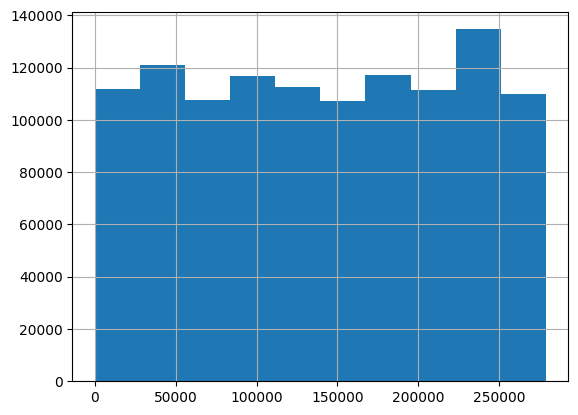

In [17]:
#  histograma das avaliações quantidade de Ratings por Usuario.
ratings['user_id'].hist(bins=10)

In [24]:
# Livros que tenham mais de 200 avaliações
x = ratings['user_id'].value_counts() > 200

In [25]:
x

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [26]:
# Quantidade Usuários
# user_ids
y = x[x].index  
print(y.shape)

(899,)


In [27]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [43]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095491 sha256=c6ef9f59b893b2631d5d2454177a427c06c591fd27350c44762affca666a374c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**Criação da Máquina Preditiva**

Biblioteca KNNBasic

In [44]:
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy

In [47]:
# Carregar o conjunto de dados 
books = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [48]:
# Dividir o conjunto de dados em treinamento e teste
trainset, testset = train_test_split(books, test_size=0.2)

In [49]:
# Definir o algoritmo KNN
k = 30  # Número de vizinhos
knn = KNNBasic(k=k, verbose=False)

In [50]:
# Treinar o modelo
knn.fit(trainset)


In [51]:
# Fazer previsões para o conjunto de teste
predictions = knn.test(testset)

In [52]:
# Calcular a precisão do modelo (por exemplo, RMSE)
accuracy.rmse(predictions)

RMSE: 0.9773


0.9772531817697302